*Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.*

**Greg DeVore**

**ML310**

**March 31st, 2018**

# Problem 1: Know thy data

In this problem we'll explore and analyze the pima dataset.

In [1]:
# Load the Pima Indians diabetes dataset from CSV URL
import numpy as np
import urllib
# URL for the Pima Indians Diabetes dataset (UW Repository)
url = "pima-dataset.csv"
# load the CSV file as a numpy matrix
dataset = np.loadtxt("pima-dataset.csv", delimiter=",")
print('CSV size: ' + str(dataset.shape))
# separate the data from the target attributes
X = dataset[:,0:8] # returns columns 1 through 8
y = dataset[:,8] # returns column 9
print('Size of X: ' + str(X.shape))
print('Size of y:' + str(y.shape))
# read text file for data descriptions
textfile = open('pima_desc.txt','r')
lines = textfile.readlines()
textfile.close()

CSV size: (768, 9)
Size of X: (768, 8)
Size of y:(768,)


The pima dataset columns are described in the file pima_desc.txt The dataset consists of 8 attributes and a binary attribute defining the class label, the presence of diabetes. Data entries are organized in rows such that attributes come first and the class label is last. Answer the following questions with the help of Python:

1.	Output the Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

2.	What is the range (minimum and maximum value) for each of the attributes?

3.  Are there any missing values? What are the means and variances of every attribute?

4.	Write a function normalize that takes an un-normalized vector of attribute values and returns the vector of values     normalized according to the data mean and standard deviation. The normalized value should be:         xnorm = (x - μx)/σx
           
5. Test your function on attribute 3 of the pima dataset. Report normalized values of the attribute 3 for the first       five entries in the dataset.  


### 1. Output Class Distribution

Here, we'll create a histogram of the response variable and obtain counts.

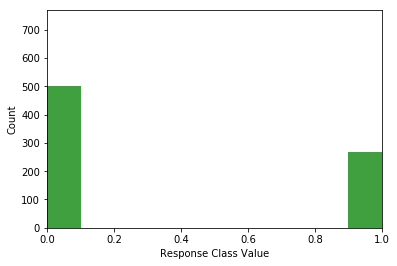

Number of patients without diabetes = 500 (response class value 0)
Number of patients with diabetes = 268 (response class value 1)


In [2]:
import matplotlib.pyplot as plt
# Output class distribution
n,bins,patches = plt.hist(y, bins=10, density=False, facecolor='g', alpha=0.75, align='mid')
plt.axis([0, 1, 0, len(y)])
plt.xlabel('Response Class Value')
plt.ylabel('Count')
plt.show()
class0 = np.sum(y == 0)
class1 = np.sum(y == 1)
print('Number of patients without diabetes = %i (response class value 0)' % class0)
print('Number of patients with diabetes = %i (response class value 1)' % class1)

### 2. Range of Attributes

Here, we'll use the numpy functions 'amax' and 'amin' on the data set.

In [3]:
# Max values
print('Attribute descriptions:')
for line in lines:
    print(line.strip())
minAttributes = np.amin(X, axis=0)
maxAttributes = np.amax(X, axis=0)
print('\nAttribute min values:')
print(minAttributes)
print('\nAttribute max values:')
print(maxAttributes)
print('\nAttribute ranges:')
print(maxAttributes - minAttributes)

Attribute descriptions:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)

Attribute min values:
[ 0.     0.     0.     0.     0.     0.     0.078 21.   ]

Attribute max values:
[ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]

Attribute ranges:
[ 17.    199.    122.     99.    846.     67.1     2.342  60.   ]


### 3. Missing Values, Mean & Variance

Here, we'll look for missing values that are either 'None' or zero (where zero makes no sense).

In [4]:
# Step 1. Check for any values labeled 'None'
if np.any(np.equal(X,None)):
    print('There are "None" type values in the data.')
else:
    print('There are no "None" type values in the data.')

There are no "None" type values in the data.


In [5]:
# Step 2. Look for zero values where they don't make sense.
# The following attributes have an invalid 'zero' value
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
print('Number of missing values (listed as "0") in the following attributes:\n')
zeroCols = np.arange(1,6)
numZero = np.sum(X[:,zeroCols] == 0, axis=0)
for item in zeroCols:
    print('%s: %i missing values' % (lines[item].strip(),numZero[item-1]))

Number of missing values (listed as "0") in the following attributes:

# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test: 5 missing values
# 3. Diastolic blood pressure (mm Hg): 35 missing values
# 4. Triceps skin fold thickness (mm): 227 missing values
# 5. 2-Hour serum insulin (mu U/ml): 374 missing values
# 6. Body mass index (weight in kg/(height in m)^2): 11 missing values


We should replace the missing values with 'NaN' before computing the mean and variance in order to not skew the results.

In [6]:
# Remove columns of interest
Xslice = X[:,zeroCols]
# Replace zeros with NaN
Xslice[np.where(Xslice == 0)] = np.nan
# Insert back into X
X[:,zeroCols] = Xslice
# View location and number of NaN's in X, should match previous number of zeros
print(sum(np.isnan(X)))

[  0   5  35 227 374  11   0   0]


Now, we can calculate the mean and variance of each attribute.

In [7]:
# Mean of each attribute (ignoring NaNs)
print('Mean of each attribute:')
print(np.nanmean(X, axis=0))
# Variance of each attribute (ignoring NaNs)
print('Variance of each attribute:')
print(np.nanvar(X, axis=0))

Mean of each attribute:
[  3.84505208 121.68676278  72.40518417  29.15341959 155.54822335
  32.45746367   0.4718763   33.24088542]
Variance of each attribute:
[1.13392724e+01 9.31203324e+02 1.53108677e+02 1.09564263e+02
 1.40718974e+04 4.78921140e+01 1.09635697e-01 1.38122964e+02]


### 4. Standardize Attribute

Here, we'll create a function that takes a vector and returns a standardized vector (z-score normalization).

In [8]:
def standardize(x):
    mux = np.nanmean(x)
    sigmax = np.sqrt(np.nanvar(x))
    xnorm = (x - mux)/sigmax
    return xnorm

### 5. Test Standardization Function

Here, we'll test the standardization function on attribute 3 (Diastolic blood pressure (mm Hg)).

In [9]:
bp_norm = standardize(X[:,2])
# Check that mean and standard deviation are 0 and 1, respectively
print('Standardized mean:')
print(np.nanmean(bp_norm))
print('\nStandardized standard deviation:')
print(np.sqrt(np.nanvar(bp_norm)))
# Print first five values
print('\nFirst five values:')
print(bp_norm[0:5])

Standardized mean:
-4.87104672195703e-16

Standardized standard deviation:
0.9999999999999999

First five values:
[-0.03274557 -0.51764464 -0.67927766 -0.51764464 -2.61887393]


# Problem 2: Decision Trees, Association and Classification Rules  

## 2.1 Briefly outline the major steps of decision tree classification.

A decision tree (whether for classification or regression) is made up of a series of nodes and branches. At each node, a decision is made based on the value of an attribute within the data set (it could be categorical or numeric). Based on the outcome of the decision, the tree branches left or right, and another node is encountered, with another decision to make. This process continues until a leaf node is reached. A leaf node represents the end of a particular chain of decisions, and contains one of the classes from the response variable. The idea is that when an instance from the data set is passed through the tree, you start at the root node (the top of the tree) and end at a leaf, at which point the most likely class is assigned to the instance based on the value of its attributes.

The major steps of decision tree classification are:
* Decide which attribute will be used for the root node. For a categorical variable, this is often based the information gained if that attribute is used to split the data (the information gained is directly related to the decrease in entropy from the split). 
* Repeat this process at subsequent nodes, splitting the remaining instances based on which attributes provide the most information gain (i.e., the greatest reduction in entropy).
* Once an entropy of zero has been calculated for a node, stop the process because a leaf node has been reached (no further information is gained because all instances belong to a particular class).
* Assign any instances that make it to that particular leaf node the class value of the instances that ended up there during the initial build of the tree.
* Recursively apply this process to all nodes until every instance has been classified (i.e., it ends up in a leaf node).

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 1   | Sunny   | Hot        | High      | Weak   | No         |
| 2   | Sunny   | Hot        | High      | Strong | No         |
| 3   | Overcast| Hot        | High      | Weak   | Yes        |
| 4   | Rain    | Mild       | High      | Weak   | Yes        |
| 5   | Rain    | Cool       | Normal    | Weak   | Yes        |
| 6   | Rain    | Cool       | Normal    | Strong | No         |
| 7   | Overcast| Cool       | Normal    | Strong | Yes        |
| 8   | Sunny   | Mild       | High      | Weak   | No         |
| 9   | Sunny   | Cool       | Normal    | Weak   | Yes        |
| 10  | Rain    | Mild       | Normal    | Weak   | Yes        |
| 11  | Sunny   | Mild       | Normal    | Strong | Yes        |
| 12  | Overcast| Mild       | High      | Strong | Yes        |
| 13  | Overcast| Hot        | Normal    | Weak   | Yes        |
| 14  | Rain    | Mild       | High      | Strong | No         |


## 2.2.	Build a decision tree from the given the tennis data set above

You should build a tree to predict PlayTennis, based on the other attributes (but, do not use the Day attribute in your tree). Show all of your work, calculations, and decisions as you build the tree. What is the classification accuracy?

*Note: Do not use any software package to answer*

We'll build our tree using entropy and information gain to decide on which attribute each node should be split. First, we need to create functions for calculating the entropy and information gain for a node.

In [10]:
# Function to compute the entropy of a single attribute
# c is a list of counts for each class
def entropySingle(c):
    p = np.zeros(len(c))
    E = 0
    for (i,ci) in enumerate(c):
        p[i] = float(ci)/np.sum(c)
        if p[i] != 0: # Catch zero probabilities (log is undefined)
            E += -p[i] * np.log2(p[i])
    return E

# Function to compute the entropy for two attributes
# cYes is a numpy array of positive class counts for each value of the attribute
# cNo is a numpy array of negative class counts for each value of the attribute
def entropyDouble(cNo,cYes):
    zips = zip(cYes,cNo)
    totals = np.array(cYes) + np.array(cNo)
    overallTotal = sum(totals)
    E = 0
    for (i,level) in enumerate(totals):
        E += (float(level)/overallTotal)*entropySingle(zips[i])
    return E

# Function to compute information gain based on splitting by two attributes
def infoGain(eS,eD):
    # Information gain is difference between entropy of the target (eS) and 
    # entropy after the target is conditioned on an attribute (eD)
    return eS - eD

Now that we have our functions, we can proceed to build our tree using the instances from the tennis table.

First, we need to decide on the root node. To do this, we'll split the response column by each of the different attributes.

In [11]:
print('Root Node')
# Entropy of response variable with no condition
Etarget = entropySingle([9,5])
print('Target entropy: ' + str(Etarget))

Root Node
Target entropy: 0.9402859586706309


In [12]:
# Target entropy conditioned on outlook
Eoutlook = entropyDouble([0,2,3],[4,3,2])
# Information gain
iGoutlook = infoGain(Etarget,Eoutlook)
print('Information gain (Outlook): ' + str(iGoutlook))

# Target entropy conditioned on temperature
Etemp = entropyDouble([1,2,2],[3,2,4])
# Information gain
iGtemp = infoGain(Etarget,Etemp)
print('Information gain (Temperature): ' + str(iGtemp))

# Target entropy conditioned on humidity
Ehumid = entropyDouble([4,1],[3,6])
# Information gain
iGhumid = infoGain(Etarget,Ehumid)
print('Information gain (Humidity): ' + str(iGhumid))

# Target entropy conditioned on wind
Ewind = entropyDouble([3,2],[3,6])
# Information gain
iGwind = infoGain(Etarget,Ewind)
print('Information gain (Wind): ' + str(iGwind))

Information gain (Outlook): 0.2467498197744391
Information gain (Temperature): 0.029222565658954647
Information gain (Humidity): 0.15183550136234136
Information gain (Wind): 0.04812703040826927


The largest reduction in entropy was from the 'Outlook' attribute, so that will be our root node.

Next, we need to repeat the above process after we've split the data based on 'Outlook'. We'll start with Sunny days.

In [13]:
print('Root Node')
# Entropy of response variable with Outlook = 'Sunny'
Etarget = entropySingle([2,3])
print('Target entropy: ' + str(Etarget))

Root Node
Target entropy: 0.9709505944546686


In [14]:
# Target entropy conditioned on temperature
Etemp = entropyDouble([0,2,1],[1,0,1])
# Information gain
iGtemp = infoGain(Etarget,Etemp)
print('Information gain (Temperature): ' + str(iGtemp))

# Target entropy conditioned on humidity
Ehumid = entropyDouble([3,0],[0,2])
# Information gain
iGhumid = infoGain(Etarget,Ehumid)
print('Information gain (Humidity): ' + str(iGhumid))

# Target entropy conditioned on wind
Ewind = entropyDouble([1,2],[1,1])
# Information gain
iGwind = infoGain(Etarget,Ewind)
print('Information gain (Wind): ' + str(iGwind))

Information gain (Temperature): 0.5709505944546686
Information gain (Humidity): 0.9709505944546686
Information gain (Wind): 0.01997309402197489


Here, splitting on 'Humidity' perfectly splits the remaining instances, so once we split on this we're done.

Now, we need to repeat the above process for 'Overcast' days.

In [15]:
print('Root Node')
# Entropy of response variable with Outlook = 'Overcast'
Etarget = entropySingle([0,5])
print('Target entropy: ' + str(Etarget))

Root Node
Target entropy: 0.0


Here, because the target entropy is zero, all instances already belong to a single class, so we're done here as well.

Finally, we need to split the data based for 'Rain' days.

In [16]:
print('Root Node')
# Entropy of response variable with Outlook = 'Rain'
Etarget = entropySingle([2,3])
print('Target entropy: ' + str(Etarget))

Root Node
Target entropy: 0.9709505944546686


In [17]:
# Target entropy conditioned on temperature
Etemp = entropyDouble([1,1],[1,2])
# Information gain
iGtemp = infoGain(Etarget,Etemp)
print('Information gain (Temperature): ' + str(iGtemp))

# Target entropy conditioned on humidity
Ehumid = entropyDouble([1,1],[1,2])
# Information gain
iGhumid = infoGain(Etarget,Ehumid)
print('Information gain (Humidity): ' + str(iGhumid))

# Target entropy conditioned on wind
Ewind = entropyDouble([2,0],[0,3])
# Information gain
iGwind = infoGain(Etarget,Ewind)
print('Information gain (Wind): ' + str(iGwind))

Information gain (Temperature): 0.01997309402197489
Information gain (Humidity): 0.01997309402197489
Information gain (Wind): 0.9709505944546686


Here, splitting on 'Wind' perfectly splits the remaining instances, so once we split on this we're done.

At this point we've completely defined our tree, and the rules are as follows:
* If Outlook = 'Sunny' and 'Humidity' = 'High' then 'PlayTennis' = 'No'
* If Outlook = 'Sunny' and 'Humidity' = 'Low' then 'PlayTennis' = 'Yes'
* If Outlook = 'Overcast' then 'PlayTennis' = 'Yes'
* If Outlook = 'Rain' and 'Wind' = 'Strong' then 'PlayTennis' = 'No'
* If Outlook = 'Rain' and 'Wind' = 'Weak' then 'PlayTennis' = 'Yes'

Note that temperature does not enter in to the decision about whether or not to play. We can turn this tree into a simple Python function:

In [18]:
def PlayTennis(Outlook,Temperature,Humidity,Wind):
    if Outlook == 'Sunny' and Humidity == 'High':
        return 'No'
    elif Outlook == 'Sunny' and Humidity == 'Low':
        return 'Yes'
    elif Outlook == 'Overcast':
        return 'Yes'
    elif Outlook == 'Rain' and Wind == 'Strong':
        return 'No'
    elif Outlook == 'Rain' and Wind == 'Weak':
        return 'Yes'
    else: # Fallthrough case, return majority class
        return 'Yes'

Let's test this on our training data. Since this data was used to build the tree, the accuracy should be 100%. To facilitate this, a CSV was created of the tennis data.

In [19]:
# Load tennis data
tennisfile = open('tennis.csv')
tennis = tennisfile.readlines()
tennisfile.close()
# Store attributes
Outlook = []
Temp = []
Humidity = []
Wind = []
Play = []
for day in tennis[1:]:
    O,T,H,W,P = day.strip().split(',')
    Outlook.append(O)
    Temp.append(T)
    Humidity.append(H)
    Wind.append(W)
    Play.append(P)

In [20]:
def predictPlay(Outlook,Temp,Humidity,Wind,Play):
    correct = 0    
    for (i,Outcome) in enumerate(Play):
        Predict = PlayTennis(Outlook[i],Temp[i],Humidity[i],Wind[i])
        if Predict == Outcome:
            correct += 1
    accuracy = float(correct)/len(Play) * 100
    return accuracy

In [21]:
# Test accuracy of decision tree on training data
trainAccuracy = predictPlay(Outlook,Temp,Humidity,Wind,Play)
print('Training set accuracy = %f%%' % trainAccuracy)    

Training set accuracy = 100.000000%


As expected, the training set accuracy is 100% since this data was used to build the tree (i.e., every instance has already been seen).

## 2.3.	Is it possible to produce some set of correct training examples that will get the algorithm to include the attribute Temperature in the learned tree, even though the true target concept is independent of Temperature? 
If no, explain. If yes, give such a set.

Yes, it is possible to select a subset of the training examples that will get the algorithm to include Temperature. There are three levels of temperature, maybe we can try subsets of two of the levels to see if any of them work. There are "3 choose 2" or 3 different combinations. First, let's try Hot and Cool:

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 1   | Sunny   | Hot        | High      | Weak   | No         |
| 2   | Sunny   | Hot        | High      | Strong | No         |
| 3   | Overcast| Hot        | High      | Weak   | Yes        |
| 5   | Rain    | Cool       | Normal    | Weak   | Yes        |
| 6   | Rain    | Cool       | Normal    | Strong | No         |
| 7   | Overcast| Cool       | Normal    | Strong | Yes        |
| 9   | Sunny   | Cool       | Normal    | Weak   | Yes        |
| 13  | Overcast| Hot        | Normal    | Weak   | Yes        |

If we get rid of Hot days where tennis is played and Cool days where it isn't, we get:

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 1   | Sunny   | Hot        | High      | Weak   | No         |
| 2   | Sunny   | Hot        | High      | Strong | No         |
| 5   | Rain    | Cool       | Normal    | Weak   | Yes        |
| 7   | Overcast| Cool       | Normal    | Strong | Yes        |
| 9   | Sunny   | Cool       | Normal    | Weak   | Yes        |

This example isn't ideal because although Temperature perfectly splits PlayTennis, so does Humidity. 

Let's try Cool and Mild:

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 4   | Rain    | Mild       | High      | Weak   | Yes        |
| 5   | Rain    | Cool       | Normal    | Weak   | Yes        |
| 6   | Rain    | Cool       | Normal    | Strong | No         |
| 7   | Overcast| Cool       | Normal    | Strong | Yes        |
| 8   | Sunny   | Mild       | High      | Weak   | No         |
| 9   | Sunny   | Cool       | Normal    | Weak   | Yes        |
| 10  | Rain    | Mild       | Normal    | Weak   | Yes        |
| 11  | Sunny   | Mild       | Normal    | Strong | Yes        |
| 12  | Overcast| Mild       | High      | Strong | Yes        |
| 14  | Rain    | Mild       | High      | Strong | No         |

If we get rid of Mild days where tennis isn't played and Cool days where it is, we get:

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 4   | Rain    | Mild       | High      | Weak   | Yes        |
| 6   | Rain    | Cool       | Normal    | Strong | No         |
| 10  | Rain    | Mild       | Normal    | Weak   | Yes        |
| 11  | Sunny   | Mild       | Normal    | Strong | Yes        |
| 12  | Overcast| Mild       | High      | Strong | Yes        |

This data set perfectly splits PlayTennis on Temperature, and not on any other feature. The rule would be
* If Temperature == 'Mild' then 'PlayTennis' = 'Yes'
* If Temperature == 'Cool' then 'PlayTennis' = 'No'

Finally, let's try Hot and Mild:

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 1   | Sunny   | Hot        | High      | Weak   | No         |
| 2   | Sunny   | Hot        | High      | Strong | No         |
| 3   | Overcast| Hot        | High      | Weak   | Yes        |
| 4   | Rain    | Mild       | High      | Weak   | Yes        |
| 8   | Sunny   | Mild       | High      | Weak   | No         |
| 10  | Rain    | Mild       | Normal    | Weak   | Yes        |
| 11  | Sunny   | Mild       | Normal    | Strong | Yes        |
| 12  | Overcast| Mild       | High      | Strong | Yes        |
| 13  | Overcast| Hot        | Normal    | Weak   | Yes        |
| 14  | Rain    | Mild       | High      | Strong | No         |

If we get rid of Hot days where tennis is played and Mild days where it isn't, we get:

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 1   | Sunny   | Hot        | High      | Weak   | No         |
| 2   | Sunny   | Hot        | High      | Strong | No         |
| 4   | Rain    | Mild       | High      | Weak   | Yes        |
| 10  | Rain    | Mild       | Normal    | Weak   | Yes        |
| 11  | Sunny   | Mild       | Normal    | Strong | Yes        |
| 12  | Overcast| Mild       | High      | Strong | Yes        |

This data set perfectly splits PlayTennis on Temperature, and not on any other feature. The rule would be
* If Temperature == 'Hot' then 'PlayTennis' = 'No'
* If Temperature == 'Mild' then 'PlayTennis' = 'Yes'

Althought we found two subsets where Temperature would be included in the decision tree, we had to work pretty hard and throw away a lot of data. This illustrates the difficulty in getting an attribute with no real predictive power to be included in the decision tree.

## 2.4 Build a tree using only examples 1-7. 
What is the classification accuracy for the training set? what is the accuracy for the test set (examples 8-14)? explain why you think these are the results.  

*Note: Do not use any software package to answer*


For this, we can repeat the effort of 2.2, only with the following training data set:

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 1   | Sunny   | Hot        | High      | Weak   | No         |
| 2   | Sunny   | Hot        | High      | Strong | No         |
| 3   | Overcast| Hot        | High      | Weak   | Yes        |
| 4   | Rain    | Mild       | High      | Weak   | Yes        |
| 5   | Rain    | Cool       | Normal    | Weak   | Yes        |
| 6   | Rain    | Cool       | Normal    | Strong | No         |
| 7   | Overcast| Cool       | Normal    | Strong | Yes        |

Along with the following test data set:

| Day | Outlook | Temperature| Humidity  | Wind   | PlayTennis |
| ----|---------|------------|-----------|--------|------------|
| 8   | Sunny   | Mild       | High      | Weak   | No         |
| 9   | Sunny   | Cool       | Normal    | Weak   | Yes        |
| 10  | Rain    | Mild       | Normal    | Weak   | Yes        |
| 11  | Sunny   | Mild       | Normal    | Strong | Yes        |
| 12  | Overcast| Mild       | High      | Strong | Yes        |
| 13  | Overcast| Hot        | Normal    | Weak   | Yes        |
| 14  | Rain    | Mild       | High      | Strong | No         |


In [22]:
print('Root Node')
# Entropy of response variable with no condition
Etarget = entropySingle([4,3])
print('Target entropy: ' + str(Etarget))

Root Node
Target entropy: 0.9852281360342515


In [23]:
# Target entropy conditioned on outlook
Eoutlook = entropyDouble([0,1,2],[2,2,0])
# Information gain
iGoutlook = infoGain(Etarget,Eoutlook)
print('Information gain (Outlook): ' + str(iGoutlook))

# Target entropy conditioned on temperature
Etemp = entropyDouble([1,2,0],[2,1,1])
# Information gain
iGtemp = infoGain(Etarget,Etemp)
print('Information gain (Temperature): ' + str(iGtemp))

# Target entropy conditioned on humidity
Ehumid = entropyDouble([2,1],[2,2])
# Information gain
iGhumid = infoGain(Etarget,Ehumid)
print('Information gain (Humidity): ' + str(iGhumid))

# Target entropy conditioned on wind
Ewind = entropyDouble([2,1],[1,3])
# Information gain
iGwind = infoGain(Etarget,Ewind)
print('Information gain (Wind): ' + str(iGwind))

Information gain (Outlook): 0.5916727785823275
Information gain (Temperature): 0.19811742113040343
Information gain (Humidity): 0.020244207153756077
Information gain (Wind): 0.12808527889139443


Once again, the biggest information gain is when 'Outlook' is used to split the data. As before, we'll further condition on the three values. First, 'Sunny':

In [24]:
print('Root Node')
# Entropy of response variable with no condition
Etarget = entropySingle([2,0])
print('Target entropy: ' + str(Etarget))

Root Node
Target entropy: 0.0


Since the target entropy is zero, all instances belong to the same class and we're done.

Next, 'Overcast':

In [25]:
print('Root Node')
# Entropy of response variable with no condition
Etarget = entropySingle([0,2])
print('Target entropy: ' + str(Etarget))

Root Node
Target entropy: 0.0


Once again, since the target entropy is zero, all instances belong to the same class and we're done.

Finally, 'Rain':

In [26]:
print('Root Node')
# Entropy of response variable with no condition
Etarget = entropySingle([1,2])
print('Target entropy: ' + str(Etarget))

Root Node
Target entropy: 0.9182958340544896


In [27]:
# Target entropy conditioned on temperature
Etemp = entropyDouble([1,0],[1,1])
# Information gain
iGtemp = infoGain(Etarget,Etemp)
print('Information gain (Temperature): ' + str(iGtemp))

# Target entropy conditioned on humidity
Ehumid = entropyDouble([0,1],[1,1])
# Information gain
iGhumid = infoGain(Etarget,Ehumid)
print('Information gain (Humidity): ' + str(iGhumid))

# Target entropy conditioned on wind
Ewind = entropyDouble([1,0],[0,2])
# Information gain
iGwind = infoGain(Etarget,Ewind)
print('Information gain (Wind): ' + str(iGwind))

Information gain (Temperature): 0.2516291673878229
Information gain (Humidity): 0.2516291673878229
Information gain (Wind): 0.9182958340544896


Here, splitting on 'Wind' perfectly splits the remaining instances, so we're done.

At this point we've completely defined our tree, and the rules are as follows:
* If Outlook = 'Sunny' then 'PlayTennis' = 'No'
* If Outlook = 'Overcast' then 'PlayTennis' = 'Yes'
* If Outlook = 'Rain' and 'Wind' = 'Strong' then 'PlayTennis' = 'No'
* If Outlook = 'Rain' and 'Wind' = 'Weak' then 'PlayTennis' = 'Yes'

As before, we can convert this to a simple Python function. Note that this is a more general set of rules than the first case where we used the entire data set. Now, both Temperature and Humidity are absent from the decision tree.

In [28]:
def PlayTennisTrain(Outlook,Temperature,Humidity,Wind):
    if Outlook == 'Sunny':
        return 'No'
    elif Outlook == 'Overcast':
        return 'Yes'
    elif Outlook == 'Rain' and Wind == 'Strong':
        return 'No'
    elif Outlook == 'Rain' and Wind == 'Weak':
        return 'Yes'
    else: # Fallthrough case, return majority class
        return 'Yes'

Let's split the tennis data that was previously loaded into training and test sets.

In [29]:
OutlookTrain = Outlook[0:7]
OutlookTest = Outlook[7:14]

TempTrain = Temp[0:7]
TempTest = Temp[7:14]

HumidityTrain = Humidity[0:7]
HumidityTest = Humidity[7:14]

WindTrain = Wind[0:7]
WindTest = Wind[7:14]

PlayTrain = Play[0:7]
PlayTest = Play[7:14]

Now, we can compute the accuracy of our new tree on the training and test data.

In [30]:
def predictPlaySubset(Outlook,Temp,Humidity,Wind,Play):
    correct = 0    
    for (i,Outcome) in enumerate(Play):
        Predict = PlayTennisTrain(Outlook[i],Temp[i],Humidity[i],Wind[i])
        if Predict == Outcome:
            correct += 1
    accuracy = float(correct)/len(Play) * 100
    return accuracy

In [31]:
# Test accuracy of decision tree on training data
trainAccuracy = predictPlaySubset(OutlookTrain,TempTrain,HumidityTrain,WindTrain,PlayTrain)
print('Training set accuracy = %f%%' % trainAccuracy) 

# Test accuracy of decision tree on test data
testAccuracy = predictPlaySubset(OutlookTest,TempTest,HumidityTest,WindTest,PlayTest)
print('Test set accuracy = %f%%' % testAccuracy) 

Training set accuracy = 100.000000%
Test set accuracy = 71.428571%


As before, the training set accuracy is 100%, which makes sense because that data was used to build the tree. However, the testing set accuracy is only ~71%, which means only 5 out of the 7 test observations was correctly classified. This is because these instances have never been seen by the tree, so there's no guarantee that a correct prediction will be made. Hopefully the training set is large enough that all cases would be covered, but in this case we only used seven observations, and not all cases were covered. As mentioned, Humidity is not used in the tree, even though we know it's an important attribute from when we built the first tree using all of the data.